## Aufgabe 1: Bis 23.4.24
Wir wollen zunächst eine Vorübung machen und die Arbeitsumgebung vorbereiten. Dafür machen wir folgendes:
Ein Agent soll sich im $\mathbb{R}^2$ bewegen. Der Agent hat eine Position $x\in \mathbb{R}^2$ und eine Rotation $\theta \in [0,2\pi]$ und bewegt sich mit konstanter Geschwindigkeit vorwärts. In jedem Zeitschritt wählt er eine neue Rotation. 
Es sind Nahrungsquellen $(b_1,...,b_M)$ verteilt, die der Agent suchen soll.

**Evolutionäre Normalverteilung** 
1. Programming the Simulation
	- Zu Beginn werden M Nahrungsquellen im Raum verteilt. Die Positionen werden aus einer Normalverteilung (oder anderer Verteilung) $N(0, \phi)$ gezogen.
	- Es werden K *Generationen* mit jeweils n Schritten simuliert. In jeder Generation werden N Instanzen mit jeweils einem Agenten $(A_1,...,A_N)$ und M Nahrungsquellen erstellt. Der Parameter $\sigma$ der Agenten wird evolutionär ausgewählt:
		- Vor der ersten Generation werden diese zufällig initialisiert $\sigma \sim G([0,2*\pi])$ (Gleichverteilung).
		- Nach jeder beendeten Generation wird für jeden Agenten ein neuer sigma-Wert wie folgt ausgewählt: Ziehe zufällig ein $\sigma$ aus der Population des vorherigen Zyklus. Dabei ist $P(\sigma_i) = \frac{S(A_i)}{\sum_{i=1}^N S(A_i)}$. Nun wird ein kleiner Wert $\delta \sim G([-\epsilon, \epsilon])$ addiert, welcher eine Mutation beschreibt.
	- Agenten A haben eine Schrittzahl n, einen Score S, eine Geschwindigkeit v (für alle gleich), und ziehen die Rotation aus einer Normalverteilung $N(0,\sigma_A)$. 
	- Nach jeder Generation werden die Werte und der erreichte Score gespeichert und nach der letzen Generation wird die Verteilung der sigmas, sowie die erreichten Scores geplotted.
	- **Open Questions:** Generate the same food for all agents or always new random sample?	
2. Nachdem die Simulation nun funktioniert geht es an die Analyse und das Hinzufügen weiterer Funktionalität
	- Zuerst sollte es ermöglicht werden die Simulation zu speichern und zu laden und reproduzierbar zu machen.
	- Ergebnisse auf Github Zwischenspeichern
	- Kann ich ohne zu viel Aufwand die Instanzen auf der GPU laufen lassen? Das könnte die Performance erheblich verbessern.
	- Analysen:
		- Simulation: Mittelwerte, Sigma-Verteilungen, msd, etc plotten. Genauer werden in den Fragestellungen.
		- Analytisch: Analyse der Simulation mit mathematischen Methoden

In [1]:
import numpy as np
import matplotlib as plt

from normal_search import *

# simulation parameters:
num_generations = 5
num_instances = 50
gen_lenth = 5000

mutation_rate = 0.3
num_food = 500
normal_scale = 500

agent_detection_radius = 25
agent_step_length = 10

random_seed = 1

params = {"num_generations": num_generations, "num_instances": num_instances, "gen_length": gen_lenth, "mutation_rate": mutation_rate, "num_food": num_food, "normal_scale": normal_scale, 
          "detection_radius": agent_detection_radius, "step_length": agent_step_length, "seed": random_seed}
sim = Simulation(params)
sim.run_sim()


simulating generation 0...
simulating generation 1...
simulating generation 2...
simulating generation 3...
simulating generation 4...


In [2]:
path = "data/sim_saves/sim1.pkl"
save_data(sim,path)

Saved data/sim_saves/sim1.pkl (21765.175 kB)


In [3]:
sim = load_data(path)

NameError: name 'load_data' is not defined

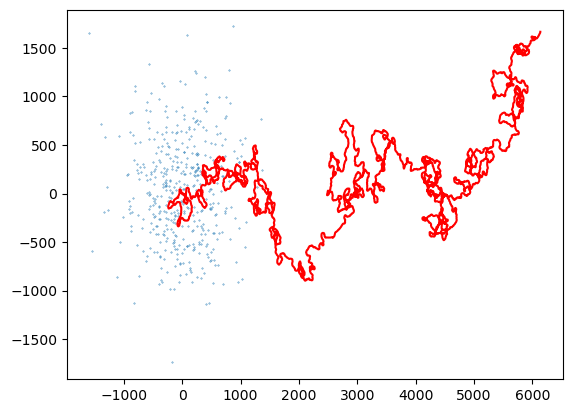

0.5890654051900919


65

In [11]:
sim.generations[-1].instances[-2].show_state()
print(sim.generations[-1].instances[-2].agent.sigma)
sim.generations[-1].instances[-2].agent.score

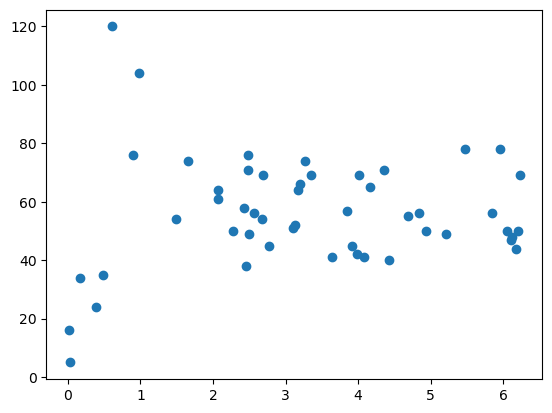

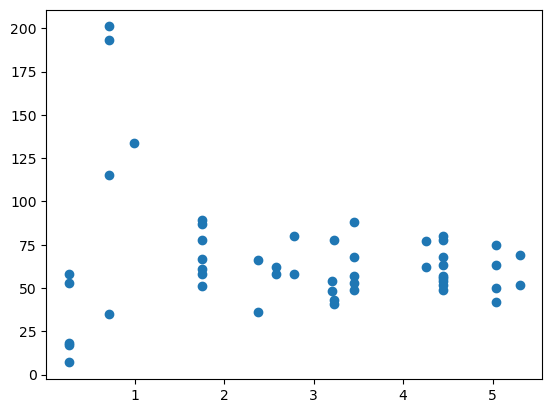

In [4]:
gen = sim.generations
gen[0].plot_scores()
gen[-1].plot_scores()

In [25]:
def analyze_results(sim, plot = False):
    # return mean, std, maybe mean squared displacement,...
    mean_scores = np.zeros(sim.num_generations) 
    for i, gen in enumerate(sim.generations):
        mean_scores[i] = np.mean(gen.scores)
    if plot:
        plt.boxplot([gen.scores for gen in sim.generations])
        plt.xlabel("generations")
        plt.ylabel("average score")
    return mean_scores
    
def plot_sample_trajectories(sim, gen_ids, ):
    pass

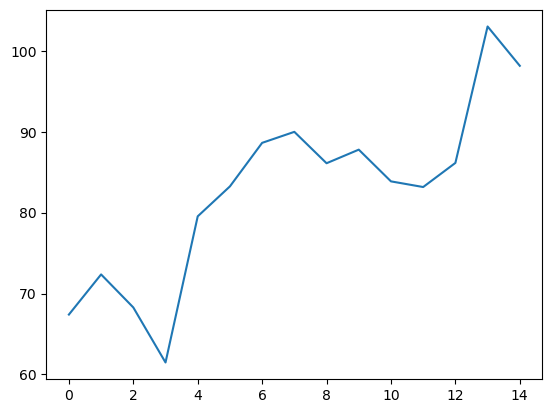

In [26]:
plt.plot(analyze_results(sim))
plt.show()
# plot the distribution of sigmas over time
hists = [np.histogram(gen.sigmas, bins=10) for gen in sim.generations]

# plt.plot([hists[i][1][:-1] for i in range(len(hists))],[hists[i][0] for i in range(len(hists))])